In [1]:
import pandas as pd
import numpy as np

In [2]:
bikes = pd.read_pickle('BikesDataVars (1).pkl')
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


### Среднее арифметическое

In [3]:
bikes['Humidity'].sum() / len(bikes['Humidity'])

np.float64(58.226255707762554)

In [4]:
bikes['Humidity'].mean()

np.float64(58.226255707762554)

### Медиана

In [5]:
hum_sorted = bikes['Humidity'].sort_values().reset_index(drop = True) # сортируем влажность (по возрастанию)
print(len(hum_sorted))

ind_1, ind_2 = int(len(hum_sorted) / 2), int(len(hum_sorted) / 2 + 1)
print(ind_1, ind_2)

print((hum_sorted[ind_1] + hum_sorted[ind_2]) / 2)

8760
4380 4381
57.0


In [6]:
bikes['Humidity'].median()

np.float64(57.0)

### Мода

In [7]:
bikes['Humidity'].value_counts().head(2)

Humidity
53    173
97    173
Name: count, dtype: int64

In [8]:
bikes['Humidity'].mode()

0    53
1    97
Name: Humidity, dtype: int64

<Axes: >

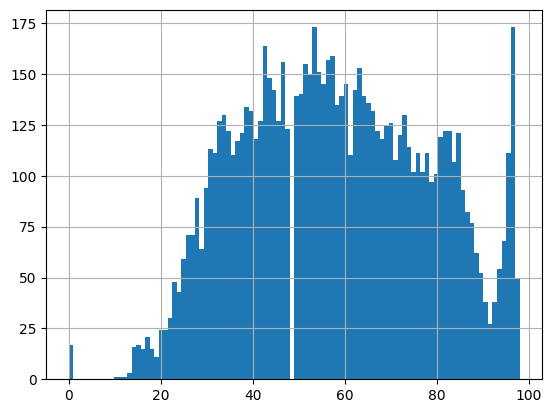

In [9]:
bikes['Humidity'].hist(bins = 100)

In [10]:
bikes.describe() # возвращение dataframe, в котором для каждой кол-венной переменной дается информация о медиане и тд

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Holiday,Rental Count,Normal Humidity,Good Weather
count,8760,8760.000000,8581.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.00000,8760.000000
mean,2018-05-31 23:59:59.999999744,11.500000,12.878557,58.226256,1.724909,0.148687,0.075068,0.049315,696.582078,0.34532,0.092694
min,2017-12-01 00:00:00,0.000000,-17.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,2018-03-02 00:00:00,5.750000,3.400000,42.000000,0.900000,0.000000,0.000000,0.000000,157.000000,0.00000,0.000000
50%,2018-06-01 00:00:00,11.500000,13.700000,57.000000,1.500000,0.000000,0.000000,0.000000,425.500000,0.00000,0.000000
75%,2018-08-31 00:00:00,17.250000,22.500000,74.000000,2.300000,0.000000,0.000000,0.000000,1009.000000,1.00000,0.000000
max,2018-11-30 00:00:00,23.000000,39.400000,98.000000,7.400000,35.000000,8.800000,1.000000,6012.000000,1.00000,1.000000
std,NaN,6.922582,11.955551,20.362413,1.036300,1.128193,0.436746,0.216537,749.812613,0.47550,0.290020


In [11]:
bikes[['Temperature', 'Humidity']].describe()

,Temperature,Humidity
count,8581.000000,8760.000000
mean,12.878557,58.226256
std,11.955551,20.362413
min,-17.800000,0.000000
25%,3.400000,42.000000
50%,13.700000,57.000000
75%,22.500000,74.000000
max,39.400000,98.000000


In [12]:
bikes['Humidity'].describe()

count    8760.000000
mean       58.226256
std        20.362413
min         0.000000
25%        42.000000
50%        57.000000
75%        74.000000
max        98.000000
Name: Humidity, dtype: float64

#### groupby

In [13]:
bikes.groupby('Hour')['Rental Count'].mean()

Hour
0      558.178082
1      415.720548
2      319.767123
3      201.010959
4      122.838356
5      135.863014
6      283.654795
7      612.646575
8      979.838356
9      642.136986
10     519.123288
11     585.336986
12     710.534247
13     700.706849
14     747.147945
15     796.084932
16     938.032877
17    1128.873973
18    1518.983562
19    1168.328767
20    1069.698630
21     997.942466
22     893.621918
23     671.898630
Name: Rental Count, dtype: float64

<Axes: xlabel='Hour'>

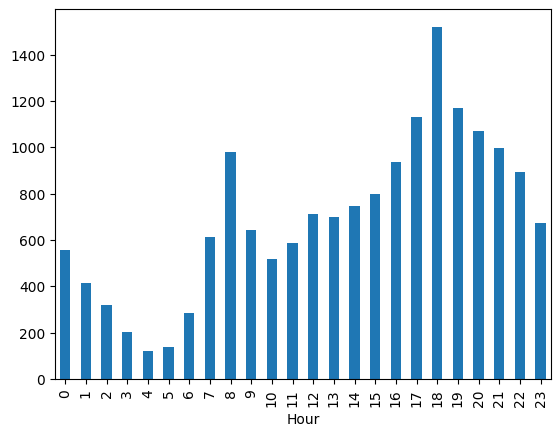

In [14]:
bikes.groupby('Hour')['Rental Count'].mean().plot(kind = 'bar')

In [15]:
bikes.groupby(['Hour', 'Good Weather'])['Rental Count'].mean()

Hour  Good Weather
0     0                514.797619
      1               1060.793103
1     0                399.179941
      1                631.384615
2     0                304.476608
      1                547.130435
3     0                193.178161
      1                361.352941
4     0                119.467236
      1                207.357143
5     0                131.218487
      1                343.125000
6     0                279.243017
      1                509.285714
7     0                604.888571
      1                793.666667
8     0                957.336336
      1               1214.000000
9     0                598.072327
      1                940.276596
10    0                478.721154
      1                756.962264
11    0                514.022801
      1                962.810345
12    0                664.558065
      1                969.672727
13    0                674.304075
      1                883.804348
14    0                736.63

In [16]:
bikes.groupby(['Hour', 'Good Weather'])['Rental Count'].median()

Hour  Good Weather
0     0                386.0
      1               1053.0
1     0                301.0
      1                621.5
2     0                230.0
      1                550.0
3     0                155.0
      1                347.0
4     0                 91.0
      1                193.5
5     0                105.0
      1                353.5
6     0                188.0
      1                349.0
7     0                386.5
      1                671.0
8     0                755.0
      1                914.5
9     0                477.0
      1                995.0
10    0                346.0
      1                724.0
11    0                422.0
      1               1005.5
12    0                506.0
      1               1048.0
13    0                505.0
      1                933.5
14    0                534.0
      1                874.0
15    0                668.5
      1                758.0
16    0                771.0
      1               10

In [17]:
bikes.groupby('Seasons')['Temperature Category'].agg(lambda x: x.value_counts().index[0])

Seasons
Autumn      Chilly
Spring      Chilly
Summer         Hot
Winter    Freezing
Name: Temperature Category, dtype: category
Categories (4, object): ['Chilly', 'Freezing', 'Hot', 'Nice']

In [18]:
bikes.groupby('Seasons')['Temperature'].agg(['mean', 'median'])

,mean,median
Seasons,,
Autumn,14.138821,13.8
Spring,13.038533,13.3
Summer,26.574827,26.6
Winter,-2.567783,-2.2


In [19]:
bikes.groupby('Seasons')['Temperature'].mean()

Seasons
Autumn    14.138821
Spring    13.038533
Summer    26.574827
Winter    -2.567783
Name: Temperature, dtype: float64

In [20]:
bikes.pivot_table(index = 'Hour', values = ['Temperature', 'Rental Count'], aggfunc = ['median', 'mean'])

median                     mean            
     Rental Count Temperature Rental Count Temperature
Hour                                                  
0           433.0       11.80   558.178082   11.253652
1           329.0       11.50   415.720548   10.972145
2           239.0       10.90   319.767123   10.542535
3           165.0       10.70   201.010959   10.355462
4            94.0       10.40   122.838356   10.069859
5           107.0       10.00   135.863014    9.849580
6           193.0       10.00   283.654795    9.763944
7           410.0        9.60   612.646575    9.454062
8           762.0       10.40   979.838356    9.988515
9           519.0       12.10   642.136986   11.459669
10          414.0       14.00   519.123288   12.766947
11          485.0       16.40   585.336986   14.285434
12          572.0       17.40   710.534247   15.417175
13          586.0       18.30   700.706849   16.184765
14          567.0       19.10   747.147945   16.862360
15          678.0       19.20   796.084932   17.084358
16          804.0       18.80   938.032877   16.821652
17          899.0       18.40  1128.873973   16.325281
18         1154.0       16.80  1518.983562   15.255956
19          845.0       15.20  1168.328767   14.254062
20          721.0       14.10  1069.698630   13.394460
21          688.0       13.40   997.942466   12.680165
22          649.0       12.95   893.621918   12.281461
23          516.0       12.25   671.898630   11.717416

### Mеры разброса

In [21]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


In [22]:
bikes_hour = pd.DataFrame(bikes.groupby('Hour')['Rental Count'].sum())

<Axes: xlabel='Hour'>

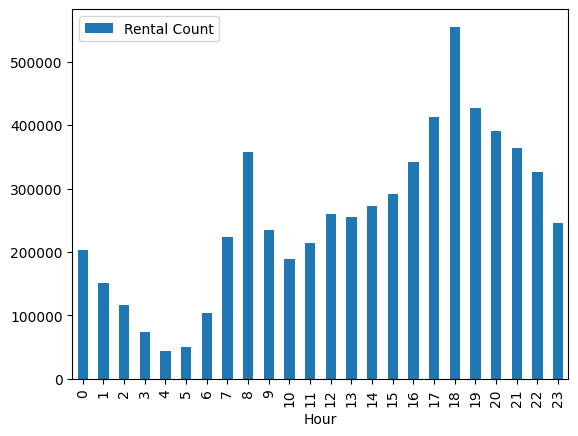

In [23]:
bikes_hour.plot(kind = 'bar')

01/ Размах

In [28]:
int(bikes_hour['Rental Count'].max() - bikes_hour['Rental Count'].min())

509593

02/ Интерквартильный размах

In [29]:
int(bikes_hour.describe()['Rental Count']['25%'])

180044

In [30]:
int(np.percentile(bikes_hour['Rental Count'], 25))

180044

In [31]:
int(np.percentile(bikes_hour['Rental Count'], 75) - np.percentile(bikes_hour['Rental Count'], 25))

166152

### Для Выборки

03/ Дисперсия

In [32]:
bikes_mean = bikes_hour['Rental Count'].mean()
deviations = bikes_hour['Rental Count'] - bikes_mean


sq_deviations = deviations ** 2

variance_samp = sq_deviations.sum() / (len(bikes_hour) - 1)
print(variance_samp)

16566399888.43297


04/ Cреднеквадратичное отклонение

In [33]:
std_samp = np.sqrt(variance_samp)
print(std_samp)

128710.52749652209


### Для генеральной совокупности

03/ Дисперсия

In [34]:
variance_pop = sq_deviations.sum() / len(bikes_hour)
print(variance_pop)

15876133226.41493


04/ Cреднеквадратичное отклонение

In [35]:
std_pop = np.sqrt(variance_pop)
print(std_pop)

126000.52867514061


Дисперсия и Cреднеквадратичное отклонение по формуле

In [36]:
## выборка

bikes_var = bikes_hour['Rental Count'].var()
bikes_std = bikes_hour['Rental Count'].std()

print(bikes_var)
print(bikes_std)

16566399888.43297
128710.52749652209


In [37]:
## ген совокупность

bikes_var_gen = bikes_hour['Rental Count'].var(ddof=0)
bikes_std_gen = bikes_hour['Rental Count'].std(ddof=0)

print(bikes_var_gen)
print(bikes_std_gen)

15876133226.41493
126000.52867514061


### Использование мер разброса в суммирующих и агригирующих таблицах

In [38]:
bikes.groupby('Hour')['Rental Count'].std()

Hour
0      455.016192
1      338.058896
2      268.797389
3      162.601701
4      106.375778
5      113.191916
6      273.636723
7      582.515881
8      871.005983
9      500.018849
10     415.278139
11     452.773454
12     538.838247
13     539.252891
14     613.267340
15     631.989742
16     744.642450
17     935.173622
18    1286.770715
19    1088.371072
20     995.999725
21     916.900635
22     787.161188
23     581.424225
Name: Rental Count, dtype: float64

In [39]:
bikes.groupby('Hour')['Rental Count'].agg(['mean', 'std', 'median'])

,mean,std,median
Hour,,,
0,558.178082,455.016192,433.0
1,415.720548,338.058896,329.0
2,319.767123,268.797389,239.0
3,201.010959,162.601701,165.0
4,122.838356,106.375778,94.0
5,135.863014,113.191916,107.0
6,283.654795,273.636723,193.0
7,612.646575,582.515881,410.0
8,979.838356,871.005983,762.0


In [40]:
def range_value(x):
    return x.max() - x.min()

bikes.pivot_table(index = 'Hour', values = ['Temperature', 'Rental Count'], aggfunc = ['var', 'std', range_value])

var                      std              range_value  \
      Rental Count Temperature Rental Count Temperature Rental Count   
Hour                                                                   
0     2.070397e+05  130.823339   455.016192   11.437803         2059   
1     1.142838e+05  129.769278   338.058896   11.391632         1485   
2     7.225204e+04  130.217762   268.797389   11.411300         1950   
3     2.643931e+04  127.842870   162.601701   11.306762          781   
4     1.131581e+04  127.332677   106.375778   11.284178          608   
5     1.281241e+04  127.921327   113.191916   11.310231          561   
6     7.487706e+04  128.232369   273.636723   11.323973         1577   
7     3.393248e+05  131.970580   582.515881   11.487845         2880   
8     7.586514e+05  142.368491   871.005983   11.931827         4438   
9     2.500188e+05  148.816319   500.018849   12.199029         2318   
10    1.724559e+05  147.593567   415.278139   12.148809         1740   
11    2.050038e+05  144.927933   452.773454   12.038602         2041   
12    2.903467e+05  142.313704   538.838247   11.929531         2239   
13    2.907937e+05  140.029017   539.252891   11.833386         2805   
14    3.760968e+05  139.832607   613.267340   11.825084         3163   
15    3.994110e+05  140.957178   631.989742   11.872539         3194   
16    5.544924e+05  139.194330   744.642450   11.798065         3671   
17    8.745497e+05  145.927077   935.173622   12.080028         4450   
18    1.655779e+06  147.720860  1286.770715   12.154047         6012   
19    1.184552e+06  140.360917  1088.371072   11.847401         5418   
20    9.920155e+05  135.874914   995.999725   11.656540         3857   
21    8.407068e+05  131.790545   916.900635   11.480006         4373   
22    6.196227e+05  131.796557   787.161188   11.480268         3432   
23    3.380541e+05  128.721555   581.424225   11.345552         2603   

                  
     Temperature  
Hour              
0           48.0  
1           47.8  
2           47.5  
3           47.2  
4           47.5  
5           47.6  
6           47.9  
7           48.0  
8           49.6  
9           50.5  
10          50.9  
11          51.4  
12          51.2  
13          51.2  
14          50.8  
15          50.7  
16          50.6  
17          50.8  
18          50.8  
19          49.9  
20          48.8  
21          48.0  
22          48.1  
23          48.1

Частотная таблица

In [41]:
bikes["Temperature Category"].value_counts()

Temperature Category
Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
Name: count, dtype: int64

In [42]:
bikes["Temperature Category"].value_counts(dropna = False)

Temperature Category
Chilly      3112
Nice        2778
Freezing    1412
Hot         1279
NaN          179
Name: count, dtype: int64

In [43]:
bikes['Good Weather'].value_counts()

Good Weather
0    7948
1     812
Name: count, dtype: int64

In [44]:
# группируем данные по какому-то признаку

In [45]:
bikes.groupby('Date')['Rental Count'].sum()

Date
2017-12-01     9802
2017-12-02     8404
2017-12-03     8644
2017-12-04     9556
2017-12-05     6578
              ...  
2018-11-26    13934
2018-11-27    13964
2018-11-28    17378
2018-11-29    18058
2018-11-30    17543
Name: Rental Count, Length: 365, dtype: int64

In [46]:
len(list(bikes.groupby('Date'))) 

365

In [47]:
list(bikes.groupby('Date'))[0][1]

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0
5,2017-12-01,5,-6.4,37,1.5,0.0,0.0,Winter,0,True,173,0,Freezing,0
6,2017-12-01,6,-6.6,35,1.3,0.0,0.0,Winter,0,True,167,0,Freezing,0
7,2017-12-01,7,-7.4,38,0.9,0.0,0.0,Winter,0,True,483,0,Freezing,0
8,2017-12-01,8,-7.6,37,1.1,0.0,0.0,Winter,0,True,853,0,Freezing,0
9,2017-12-01,9,-6.5,27,0.5,0.0,0.0,Winter,0,True,238,0,Freezing,0


In [48]:
bikes['Seasons'].value_counts()

Seasons
Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: count, dtype: int64

In [49]:
bikes.groupby('Seasons').size()

Seasons
Autumn    2184
Spring    2208
Summer    2208
Winter    2160
dtype: int64

In [50]:
bikes.groupby('Seasons')['Good Weather'].value_counts()

Seasons  Good Weather
Autumn   0               1861
         1                323
Spring   0               1949
         1                259
Summer   0               1978
         1                230
Winter   0               2160
Name: count, dtype: int64

In [53]:
bikes.groupby(['Seasons','Temperature Category'], observed=False)['Rental Count'].sum()

Seasons  Temperature Category
Autumn   Chilly                   775694
         Freezing                  12035
         Hot                      134156
         Nice                     811498
Spring   Chilly                   587211
         Freezing                   6331
         Hot                       52993
         Nice                     928572
Summer   Chilly                        0
         Freezing                      0
         Hot                     1315525
         Nice                     892664
Winter   Chilly                   215221
         Freezing                 258570
         Hot                           0
         Nice                          0
Name: Rental Count, dtype: int64

Визуализация

Кол-венные данные

In [54]:
bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Rental Count,Normal Humidity,Temperature Category,Good Weather
0,2017-12-01,0,-5.2,37,2.2,0.0,0.0,Winter,0,True,257,0,Freezing,0
1,2017-12-01,1,-5.5,38,0.8,0.0,0.0,Winter,0,True,219,0,Freezing,0
2,2017-12-01,2,-6.0,39,1.0,0.0,0.0,Winter,0,True,162,0,Freezing,0
3,2017-12-01,3,-6.2,40,0.9,0.0,0.0,Winter,0,True,148,1,Freezing,0
4,2017-12-01,4,-6.0,36,2.3,0.0,0.0,Winter,0,True,97,0,Freezing,0


<Axes: >

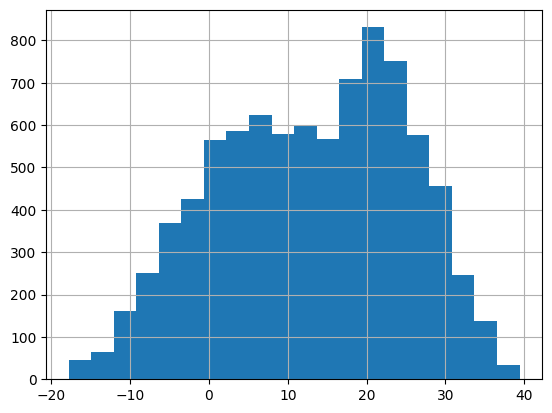

In [55]:
bikes['Temperature'].hist(bins = 20)  #гистограмма

<Axes: xlabel='Temperature Category'>

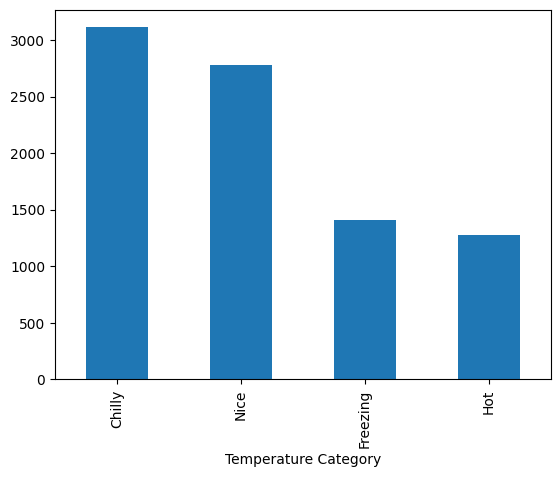

In [56]:
bikes['Temperature Category'].value_counts().plot(kind = 'bar') # стоблчатая диаграмма

<Axes: xlabel='Temperature Category'>

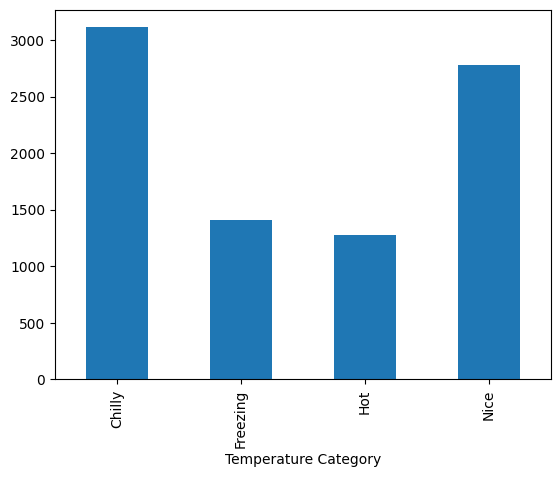

In [64]:
bikes.groupby('Temperature Category', observed=True).size().plot(kind='bar')

In [65]:
## из нескольких категорий

<Axes: xlabel='Seasons,Temperature Category'>

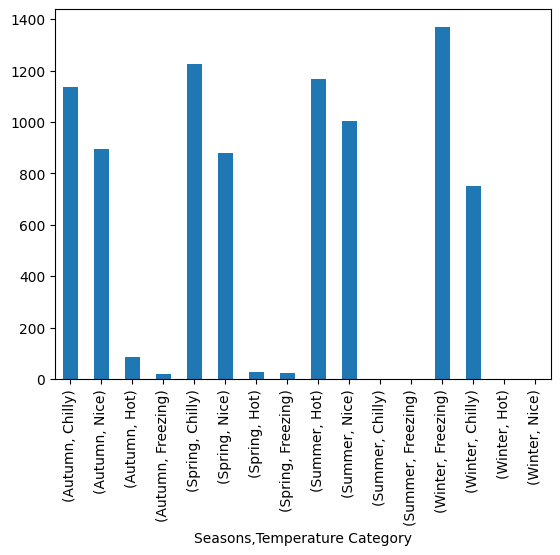

In [66]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().plot(kind = 'bar')

In [67]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack()

Temperature Category,Chilly,Freezing,Hot,Nice
Seasons,,,,
Autumn,1138,20,86,894
Spring,1224,22,27,881
Summer,0,0,1166,1003
Winter,750,1370,0,0


<Axes: xlabel='Seasons'>

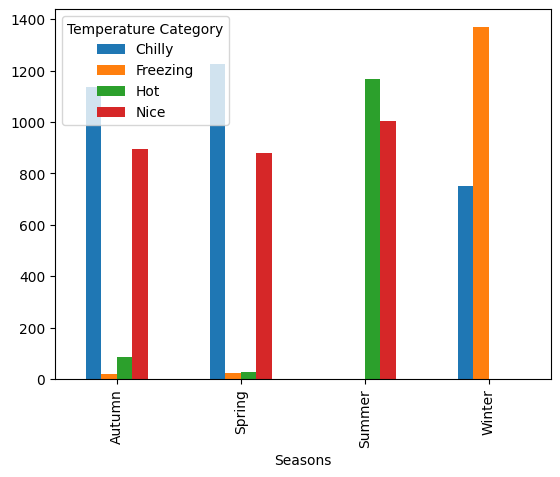

In [68]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind = 'bar')

<Axes: xlabel='Seasons'>

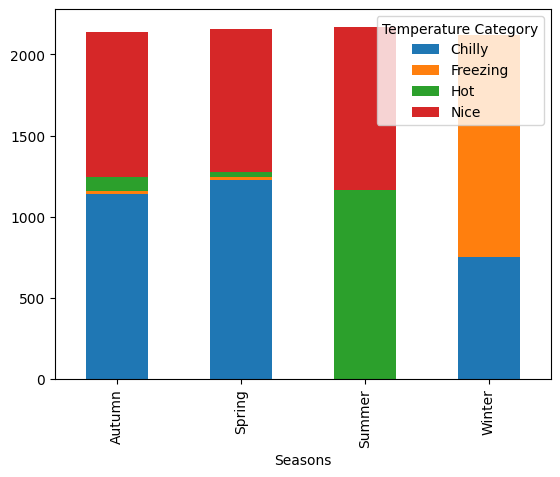

In [69]:
bikes.groupby('Seasons')['Temperature Category'].value_counts().unstack().plot(kind = 'bar', stacked = True)